In [110]:
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras.layers import Dense
from keras.optimizers import Nadam, Adam
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
np.random.seed(42)
from sklearn import metrics

# Dataset from [Here](https://www.kaggle.com/mlg-ulb/creditcardfraud)

In [111]:
data=pd.read_csv("creditcard.csv", sep=",")

In [112]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [113]:
data.shape

(284807, 31)

In [114]:
data['Time'] = StandardScaler().fit_transform(data['Time'].values.reshape(-1, 1))
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [115]:
# для тренировки оставим только не Fraud
X_train, X_test = train_test_split(data, test_size=0.2,random_state=42)
X_train=X_train[X_train["Class"]==0]
X_train=X_train.drop(["Class"], axis=1)

In [116]:
y=X_test["Class"]
X_test=X_test.drop(["Class"], axis=1)

In [117]:
NB_EPOCH = 2
BATCH_SIZE = 256
VERBOSE = 1
OPTIMIZER = Adam(0.001)
print(OPTIMIZER.learning_rate)
VALIDATION_SPLIT = 0.2
input_dim = X_train.shape[1]

<tf.Variable 'Adam/learning_rate:0' shape=() dtype=float32, numpy=0.001>


In [118]:
model = Sequential()
model.add(Dense(100, input_dim=input_dim, activation='linear'))
model.add(Dense(50, activation='linear'))
model.add(Dense(50, activation='linear'))
model.add(Dense(100, activation='linear'))
model.add(Dense(input_dim,activation="linear"))

In [119]:
model.compile(optimizer=OPTIMIZER,
                    loss='mean_squared_error',
                    metrics=['accuracy'])

In [120]:
history = model.fit(X_train, X_train,
                    epochs=NB_EPOCH,
                    batch_size=BATCH_SIZE,
                    shuffle=True,
                    validation_split=VALIDATION_SPLIT,
                    verbose=VERBOSE)

Train on 181960 samples, validate on 45491 samples
Epoch 1/2
181960/181960 [==============================] - 4s 22us/step - loss: 0.0449 - accuracy: 0.9377 - val_loss: 0.0029 - val_accuracy: 0.9788
Epoch 2/2
181960/181960 [==============================] - 4s 23us/step - loss: 7.7971e-04 - accuracy: 0.9915 - val_loss: 0.0028 - val_accuracy: 0.9939


In [121]:
predictions = model.predict(X_test)
mse = np.mean(np.power((X_test - predictions),2), axis=1)

In [122]:
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y})

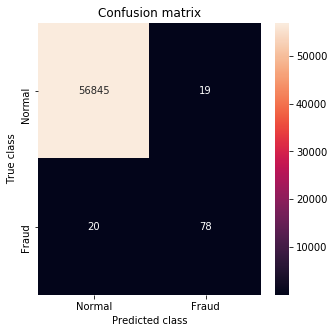

In [127]:
LABELS = ["Normal", "Fraud"]

threshold = 0.1
y_pred = [1 if e > threshold else 0 for e in mse]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [128]:
print("Accuracy:", np.round(metrics.accuracy_score(error_df.true_class, y_pred),4))
print("f1-мера:", np.round(metrics.f1_score(error_df.true_class, y_pred),4))
print("roc_auc_score:", np.round(metrics.roc_auc_score(error_df.true_class, y_pred),4))

Accuracy: 0.9993
f1-мера: 0.8
roc_auc_score: 0.8978
